In [1]:

import os

import pandas as pd      
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


use kaggle API to download the zip file and load from it the CSV file

In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
!kaggle datasets download -d mattop/arrests-in-the-city-of-chicago-2014-2023



  0%|          | 0.00/22.1M [00:00<?, ?B/s]
  5%|4         | 1.00M/22.1M [00:00<00:02, 8.80MB/s]
 27%|##7       | 6.00M/22.1M [00:00<00:01, 11.6MB/s]
 50%|####9     | 11.0M/22.1M [00:00<00:00, 15.0MB/s]
 68%|######7   | 15.0M/22.1M [00:00<00:00, 18.5MB/s]
 95%|#########5| 21.0M/22.1M [00:00<00:00, 23.3MB/s]
100%|##########| 22.1M/22.1M [00:00<00:00, 39.4MB/s]


In [8]:
import subprocess
import zipfile
import pandas as pd
import os


zip_file = "arrests-in-the-city-of-chicago-2014-2023.zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

df_list = []
for filename in os.listdir():
    if filename.endswith(".csv"):
        df_name = "df_" + filename.split(".")[0]
        locals()[df_name] = pd.read_csv(filename)
        df_list.append(df_name)

print("List of dataframes:", df_list)
        


List of dataframes: ['df_chicago_arrests']


Arrests in the City of Chicago (2014 - 2023)

Each record in this dataset shows information about an arrest executed by the Chicago Police Department (CPD). Source data comes from the CPD Automated Arrest application. This electronic application is part of the CPD CLEAR (Citizen Law Enforcement Analysis and Reporting) system, and is used to process arrests Department-wide.

The data is limited to adult arrests, defined as any arrest where the arrestee was 18 years of age or older on the date of arrest. The data excludes arrest records expunged by CPD pursuant to the Illinois Criminal Identification Act (20 ILCS 2630/5.2).

In [9]:
chicago_arrests = df_chicago_arrests

In [10]:
chicago_arrests.head()

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,18922700,NaN,06/26/2014 10:51:00 PM,BLACK,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,NaN,Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,725 ILCS 5.0/110-3 | | |,ISSUANCE OF WARRANT | | |,| | |,Z | | |
1,18922086,NaN,06/26/2014 12:07:00 AM,BLACK,625 ILCS 5.0/6-303-A,DRIVING ON SUSPENDED LICENSE,M,A,9-76-160(A),DISPLAY ST REG-FRONT/REAR,...,NaN,NaN,NaN,NaN,NaN,NaN,625 ILCS 5.0/6-303-A | 9-76-160(A) | |,DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...,M | | |,A | L | |
2,18908465,HX290868,06/05/2014 11:58:00 AM,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,720 ILCS 600.0/3.5-A,PCS - DRUG PARAPHERNALIA - POSSESS,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/402-C | 720 ILCS 600.0/3.5-A | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | M | |,4 | A | |
3,18914257,HX302763,06/14/2014 04:50:00 AM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,520 ILCS 5.0/1.22,RESIST/OBSTRUCT OFFICER,...,M,A,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3-A-1 | 520 ILCS 5.0/1.22 | 72...,BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...,M | M | M |,A | A | A |
4,18911035,NaN,06/09/2014 08:45:00 AM,BLACK,8-4-030,DRINKING ALCOHOL ON THE PUBLIC WAY,NaN,L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8-4-030 | | |,DRINKING ALCOHOL ON THE PUBLIC WAY | | |,| | |,L | | |


In [11]:
chicago_arrests["date"] = pd.to_datetime(chicago_arrests["ARREST DATE"], format="%m/%d/%Y %I:%M:%S %p")
chicago_arrests= chicago_arrests.rename(columns=str.lower) 
chicago_arrests['day'] = chicago_arrests['date'].dt.day_name()
chicago_arrests['month'] = chicago_arrests['date'].dt.month
chicago_arrests['year'] = chicago_arrests['date'].apply(lambda x: x.year)

In [12]:
chicago_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585418 entries, 0 to 585417
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   cb_no                 585418 non-null  int64         
 1   case number           357958 non-null  object        
 2   arrest date           585418 non-null  object        
 3   race                  585418 non-null  object        
 4   charge 1 statute      585418 non-null  object        
 5   charge 1 description  585418 non-null  object        
 6   charge 1 type         458909 non-null  object        
 7   charge 1 class        580702 non-null  object        
 8   charge 2 statute      247963 non-null  object        
 9   charge 2 description  247963 non-null  object        
 10  charge 2 type         140908 non-null  object        
 11  charge 2 class        245761 non-null  object        
 12  charge 3 statute      136051 non-null  object        
 13 

In [13]:
chicago_arrests.describe()

,cb_no,month,year
count,5.854180e+05,585418.000000,585418.000000
mean,2.086845e+07,6.359017,2017.310737
std,3.667880e+06,3.376493,2.447963
min,1.881232e+07,1.000000,2014.000000
25%,1.916879e+07,3.000000,2015.000000
50%,1.952820e+07,6.000000,2017.000000
75%,1.985557e+07,9.000000,2019.000000
max,3.020946e+07,12.000000,2023.000000


In [14]:
n = chicago_arrests.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 cb_no                   585418
case number             321049
arrest date             484109
race                         7
charge 1 statute          1358
charge 1 description      2278
charge 1 type                5
charge 1 class              13
charge 2 statute          1474
charge 2 description      2120
charge 2 type                6
charge 2 class              13
charge 3 statute          1258
charge 3 description      1682
charge 3 type                5
charge 3 class              13
charge 4 statute          1015
charge 4 description      1297
charge 4 type                5
charge 4 class              13
charges statute          85221
charges description      99917
charges type                48
charges class             1839
date                    484109
day                          7
month                       12
year                        10
dtype: int64


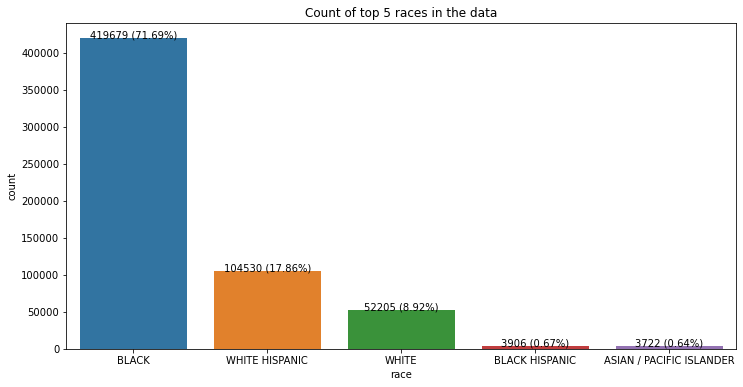

In [15]:


plt.figure(figsize=(12,6))
sns.countplot(data=chicago_arrests, x='race', order = chicago_arrests['race'].value_counts().iloc[:5].index)

for i in range(chicago_arrests['race'].value_counts().iloc[:5].shape[0]):
    count = chicago_arrests['race'].value_counts().iloc[:5].values[i]
    pct = (count/chicago_arrests.shape[0])*100
    label = '{} ({:0.2f}%)'.format(count,pct)
    plt.text(i, count+3, label, ha = 'center')

plt.title(f'Count of top 5 races in the data')
plt.show()

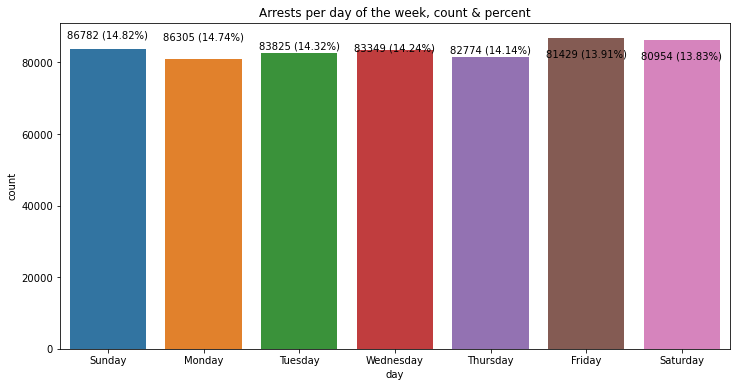

In [16]:


plt.figure(figsize=(12,6))
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.countplot(data=chicago_arrests, x='day', order=order)

for i in range(chicago_arrests['day'].value_counts().shape[0]):
    count = chicago_arrests['day'].value_counts().values[i]
    pct = (count/chicago_arrests.shape[0])*100
    label = '{} ({:0.2f}%)'.format(count,pct)
    plt.text(i, count+3, label, ha = 'center')

plt.title("Arrests per day of the week, count & percent")
plt.show()


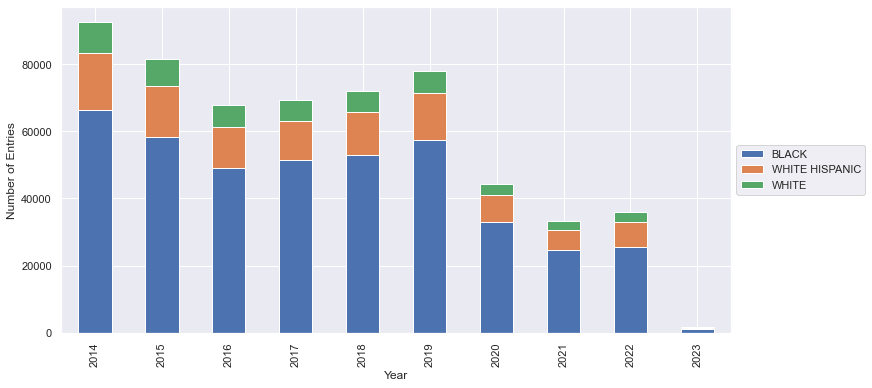

In [17]:
# Group the data by 'year' and 'race' and count the number of entries
grouped = chicago_arrests.groupby(['year', 'race'])['cb_no'].count().reset_index()

# Pivot the data so that each race is a separate column
pivot = grouped.pivot(index='year', columns='race', values='cb_no')

# Get the top 3 races for each year by taking the sum of each race column and sorting
top_races = pivot.sum().sort_values(ascending=False).head(3).index

# Plot a stacked bar chart with the top 3 races
sns.set(rc={'figure.figsize':(12,6)})
pivot[top_races].plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()

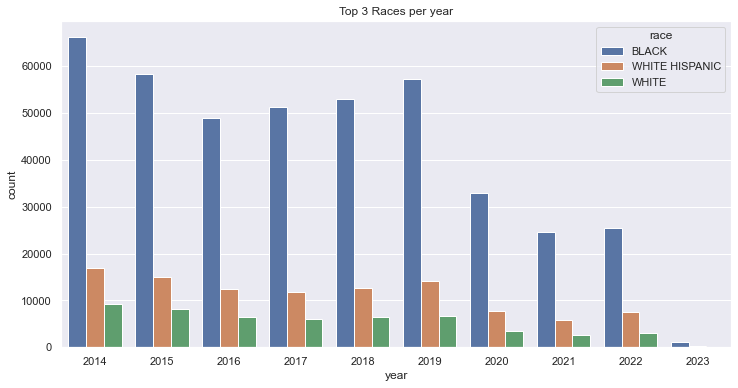

In [18]:


plt.figure(figsize=(12,6))

df_grouped = chicago_arrests.groupby(['year', 'race'])['race'].count().reset_index(name='count')
df_grouped = df_grouped.sort_values(by=['year', 'count'], ascending=[True, False])

# Get top 3 races for each year
df_top_3 = df_grouped.groupby(['year']).head(3).reset_index(drop=True)

sns.barplot(x='year', y='count', hue='race', data=df_top_3)

plt.title("Top 3 Races per year")
plt.show()

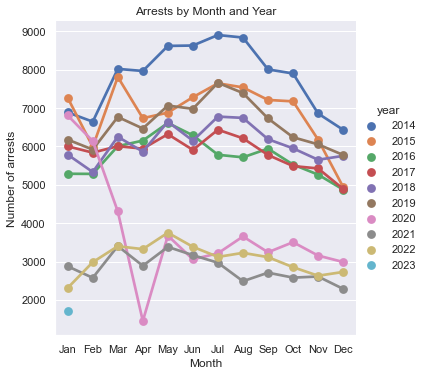

In [19]:


# Count number of rows for each month and year
monthly_arrest_count = chicago_arrests.groupby(['year', 'month']).size().reset_index(name='count')

# Plot line plot using seaborn
sns.set(rc={'figure.figsize':(12,8)})
g = sns.catplot(x='month', y='count', hue='year', kind='point', data=monthly_arrest_count)
g.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel('Month')
plt.ylabel('Number of arrests')
plt.title('Arrests by Month and Year')
plt.show()


January 2020: CPD rolls out a revised search warrant policy and a related training. The policy requires CPD to conduct a detailed investigation before executing any warrant, which is intended to reduce mistakes and ensure the safety of the public and of the CPD officers executing the warrant.

January 2020: CPD announces creation of the Office of Constitutional Policing and Reform Management, a new organizational effort to prioritize reform efforts under the Consent Decree.

January 2020: Officers begin Custodial Escort Training, which re-asserted the Vision, Mission Statement, and Core Values of the Chicago Police Department while teaching best practices to be used while escorting someone in custody.

**most notable events was the death of George Floyd, who was killed by a Minneapolis police officer on May 25, 2020. This led to nationwide protests against police brutality and racial injustice, including in Chicago**

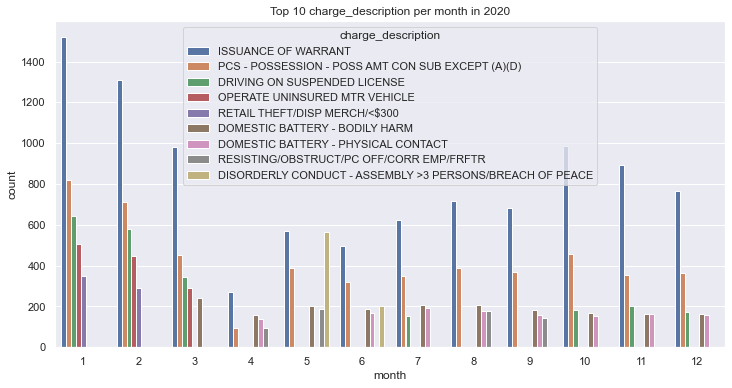

In [20]:
chicago_arrests_2020 = chicago_arrests[(chicago_arrests['date'].dt.year == 2020)]

df_2020_charge_1_description = chicago_arrests_2020[['month', 'charge 1 description']]
df_2020_charge_1_description = df_2020_charge_1_description.rename(columns={'charge 1 description': 'charge_description'})

df_2020_charge_2_description = chicago_arrests_2020[['month', 'charge 2 description']]
df_2020_charge_2_description = df_2020_charge_2_description.rename(columns={'charge 2 description': 'charge_description'})

df_2020_charge_3_description = chicago_arrests_2020[['month', 'charge 3 description']]
df_2020_charge_3_description = df_2020_charge_3_description.rename(columns={'charge 3 description': 'charge_description'})

df_2020_charge_4_description = chicago_arrests_2020[['month', 'charge 4 description']]
df_2020_charge_4_description = df_2020_charge_4_description.rename(columns={'charge 4 description': 'charge_description'})

df_concatenated = pd.concat([df_2020_charge_1_description, df_2020_charge_2_description,df_2020_charge_3_description,df_2020_charge_4_description], axis=0)


plt.figure(figsize=(12,6))

df_grouped = df_concatenated.groupby(['month', 'charge_description'])['charge_description'].count().reset_index(name='count')
df_grouped = df_grouped.sort_values(by=['month', 'count'], ascending=[True, False])

# Get top 3 races for each year
df_top_5 = df_grouped.groupby(['month']).head(5).reset_index(drop=True)

sns.barplot(x='month', y='count', hue='charge_description', data=df_top_5)

plt.title("Top 10 charge_description per month in 2020")
plt.show()


Monthly percent change of charge_description count


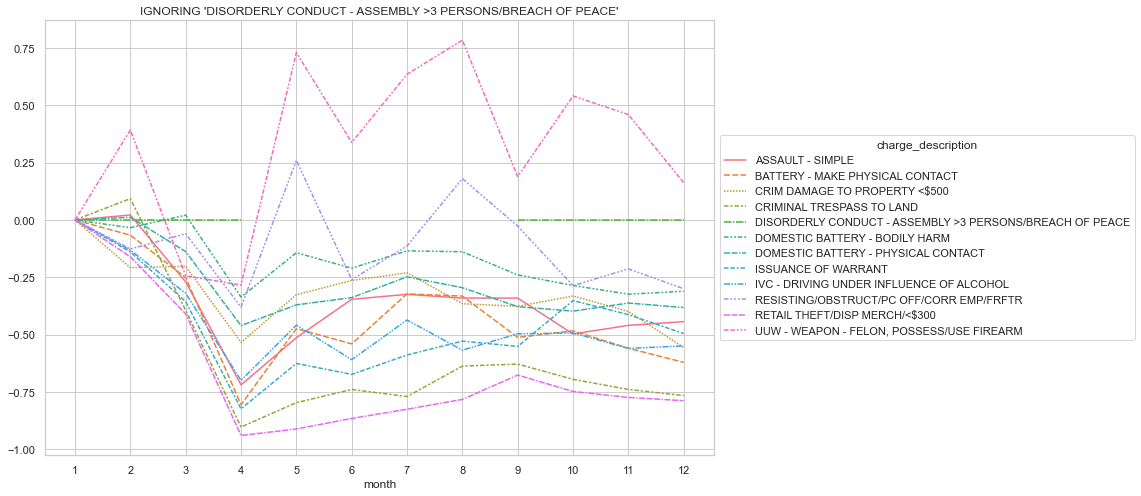

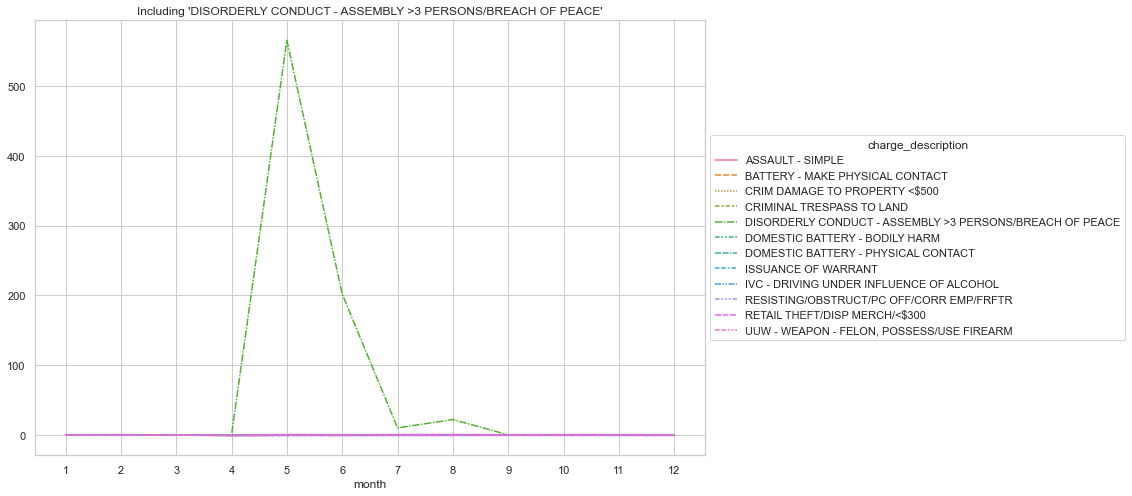

In [21]:

print("Monthly percent change of charge_description count")

top_20 = df_concatenated.groupby('charge_description')['charge_description'].count().nlargest(20).reset_index(name='counts')
wanted_charge_description = top_20.iloc[[0,4, 5, 6, 7, 9,10,11,12,13,14, 19]]


df_wanted_charges_0 = df_concatenated.groupby(['month', 'charge_description']).size().reset_index(name='counts')
df_pivot = df_wanted_charges_0.pivot_table(index='month', columns='charge_description', values='counts', fill_value=0)
df_grouped = df_pivot.reset_index().melt(id_vars='month', value_name='counts')
#df_grouped

df_wanted_charges_1 = df_grouped[df_grouped['charge_description'].isin(wanted_charge_description['charge_description'].unique())]




df = df_wanted_charges_1.pivot(index='month', columns='charge_description', values='counts')
df = (df.pct_change() + 1).cumprod() - 1
df.fillna(0, inplace=True)

sns.set(style="whitegrid")
ax = sns.lineplot(data=df)
plt.xticks(range(1, 13), range(1, 13)) # to set the X axis to show all 12 months
plt.legend(title='charge_description', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("IGNORING 'DISORDERLY CONDUCT - ASSEMBLY >3 PERSONS/BREACH OF PEACE'")
plt.show()

##KEEP

df_wanted_charges_0 = df_concatenated.groupby(['month', 'charge_description']).size().reset_index(name='counts')
df_pivot_with_DISORDERLY = df_wanted_charges_0.pivot_table(index='month', columns='charge_description', values='counts', fill_value=1)
df_grouped_with_DISORDERLY = df_pivot_with_DISORDERLY.reset_index().melt(id_vars='month', value_name='counts')
#df_grouped

df_wanted_charges_1_with_DISORDERLY = df_grouped_with_DISORDERLY[df_grouped_with_DISORDERLY['charge_description'].isin(wanted_charge_description['charge_description'].unique())]




df_with_DISORDERLY = df_wanted_charges_1_with_DISORDERLY.pivot(index='month', columns='charge_description', values='counts')
df_with_DISORDERLY = (df_with_DISORDERLY.pct_change() + 1).cumprod() - 1
df_with_DISORDERLY.fillna(0, inplace=True)

sns.set(style="whitegrid")
ax = sns.lineplot(data=df_with_DISORDERLY)
plt.xticks(range(1, 13), range(1, 13)) # to set the X axis to show all 12 months
plt.legend(title='charge_description', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Including 'DISORDERLY CONDUCT - ASSEMBLY >3 PERSONS/BREACH OF PEACE'")
plt.show()


In the plots above you can see the percent change of DISORDERLY CONDUCT - ASSEMBLY >3 PERSONS/BREACH OF PEACE arrests due to the riots